# [SODA3.4.2](https://dsrs.atmos.umd.edu/DATA/soda3.4.2/ORIGINAL/)

> https://www2.atmos.umd.edu/~ocean/index_files/soda3.3.1_mn_download.htm

> https://dsrs.atmos.umd.edu/DATA/soda3.4.2/ORIGINAL/

In [1]:
import xarray as xr
import numpy as np
import matplotlib as plt
%matplotlib inline
xr.set_options(display_style='text')
import fsspec;

In [2]:
from xgcm import Grid
from xgcm.autogenerate import generate_grid_ds

In [3]:
url = 'https://dsrs.atmos.umd.edu/DATA/soda3.4.2/ORIGINAL/transport/soda3.4.2_10dy_transport_or_2004_04_09.nc'
with fsspec.open(url) as fp:
    ds = xr.open_dataset(fp)
    display(ds)

<xarray.Dataset>
Dimensions:         (nv: 2, st_edges_ocean: 51, st_ocean: 50, time: 1, xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1070, yu_ocean: 1070)
Coordinates:
  * xu_ocean        (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yt_ocean        (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.84 89.95
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * time            (time) object 2004-04-09 01:00:00
  * nv              (nv) float64 1.0 2.0
  * xt_ocean        (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yu_ocean        (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
Data variables:
    tx_trans        (time, st_ocean, yt_ocean, xu_ocean) float32 ...
    ty_trans        (time, st_ocean, yu_ocean, xt_ocean) float32 ...
    tx_int          (time, yt_ocean, xu_ocean) float32 ...
    ty_int          (time, yu_ocean, xt_ocean) float32 ...
    average_T1      (time) datetime64[ns] ...
    average_T2      (time) datetime64[ns] ...
    average_DT      (time) timedelta64[ns] ...
    time_bounds     (time, nv) timedelta64[ns] ...
Attributes:
    filename:   soda3.4.2_10dy_transport_or_2004_04_09.nc
    title:      MOM5_SODA_3.4.2
    grid_type:  mosaic
    grid_tile:  1

## Meridional transport

In [41]:
ds.ty_int

<xarray.DataArray 'ty_int' (time: 1, yu_ocean: 1070, xt_ocean: 1440)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time      (time) object 2004-04-09 01:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
Attributes:
    long_name:      T-cell j-mass transport vertically summed
    units:          Sv (10^9 kg/s)
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_c

In [4]:
tot_ytransport = ds.ty_int.sum('xt_ocean')
tot_ytransport

<xarray.DataArray 'ty_int' (time: 1, yu_ocean: 1070)>
array([[0.        , 0.        , 0.        , ..., 0.00096393, 0.00044763,
        0.        ]], dtype=float32)
Coordinates:
  * time      (time) object 2004-04-09 01:00:00
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

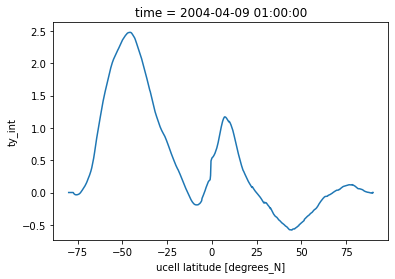

In [5]:
tot_ytransport.plot()

## E-P-R

In [7]:
evap_url = 'http://kage.ldeo.columbia.edu:81/expert/home/.OTHER/.richard/.whoi/.oaflux/.data_v3/.monthly/.evaporation/.evapr.nc%5BT%5Daverage/dods'
precip_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/%5BT%5D/average/dods'

evap = xr.open_dataset(evap_url, decode_times=False)
precip = xr.open_dataset(precip_url, decode_times=False)

print(evap.load())
print(precip.load())

<xarray.Dataset>
Dimensions:  (T: 688, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * T        (T) float32 -23.5 -22.5 -21.5 -20.5 ... 660.5 661.5 662.5 663.5
Data variables:
    evapr    (T, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    nco_openmp_thread_number:  1
    Conventions:               IRIDL
    NCO:                       4.3.7
    history:                   Tue Jul 21 15:45:00 2015: ncatted -a gridtype,...
<xarray.Dataset>
Dimensions:  (T: 357, X: 144, Y: 72)
Coordinates:
  * T        (T) float32 228.5 229.5 230.5 231.5 ... 581.5 582.5 583.5 584.5
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    prcp     (T, Y, X) float32 nan nan nan nan nan ... 1.112 1.104 1.09 1.

In [37]:
precip_i = -360/10*precip.prcp.rename({'X': 'lon', 'Y': 'lat'}).interp_like(evap)
e_minus_p = precip_i.sel(T=228.5) + evap.evapr.sel(T=228.5)
e_minus_p

<xarray.DataArray (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    T        float64 228.5

In [42]:
#converting cm/yr to m/s
e_minus_p_ms = (e_minus_p * 0.01) / 3.154e7

In [2]:
e_minus_p_ms.plot()

NameError: name 'e_minus_p_ms' is not defined

In [47]:
#converting 10^9kg/s to m^3/s
transport = ds.ty_int / 1034

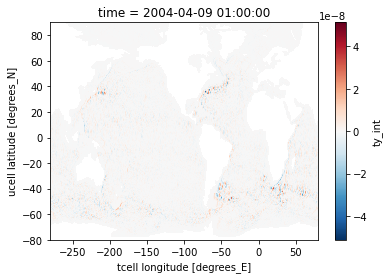

In [51]:
(transport/1e6).plot()

In [1]:
(e_minus_p_ms - (transport/1e6)).plot()

NameError: name 'e_minus_p_ms' is not defined

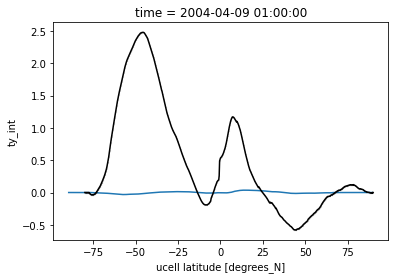

In [40]:
(e_minus_p/1e6).sum('lon').plot()
tot_ytransport.plot(color='k', marker='.', markersize=0.1)

In [9]:
tot_ytrans = ds.ty_trans.sum(('xt_ocean', 'st_ocean'))
tot_ytrans

<xarray.DataArray 'ty_trans' (time: 1, yu_ocean: 1070)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.6323341e-04,
        4.4782646e-04, 1.3411045e-07]], dtype=float32)
Coordinates:
  * time      (time) object 2004-04-09 01:00:00
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

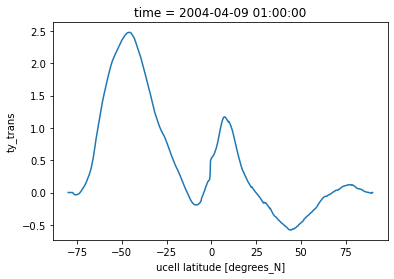

In [11]:
tot_ytrans.plot()

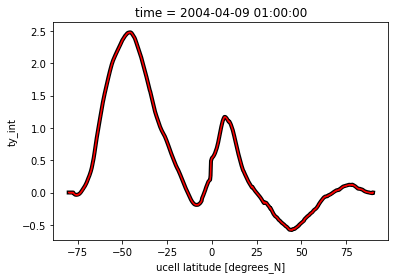

In [25]:
tot_ytrans.plot(color='k', linewidth=4)
tot_ytransport.plot(color='red', marker='.', markersize=0.1)

In [ ]:
grid = Grid(ds, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'},
                        'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                        'Z': {'center': 'st_ocean', 'right': 'sw_ocean'}},
            periodic=['X'])
grid

In [9]:
dz = grid.diff(ds.sw_ocean, 'Z', boundary='fill')
dz

<xarray.DataArray (st_ocean: 50)>
array([ 10.06709957,  10.09290028,  10.12890053,  10.17849922,
        10.24740219,  10.34269714,  10.47480392,  10.6576004 ,
        10.9101944 ,  11.25960541,  11.74169922,  12.40619659,
        13.32000732,  14.57260132,  16.28289795,  18.604599  ,
        21.73239136,  25.90260315,  31.3868103 ,  38.4697876 ,
        47.40710449,  58.35928345,  71.30871582,  85.9883728 ,
       101.85479736, 118.14520264, 134.01159668, 148.69128418,
       161.64074707, 172.59289551, 181.53027344, 188.61315918,
       194.09741211, 198.26745605, 201.39550781, 203.71704102,
       205.42749023, 206.67993164, 207.59399414, 208.25805664,
       208.74047852, 209.08984375, 209.34228516, 209.52539062,
       209.65722656, 209.75244141, 209.82177734, 209.87109375,
       209.90673828, 209.93310547])
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [18]:
R = 6.378e6
dy = 2*np.pi*R / 360 / 3
dy

37105.69989739945

In [10]:
#calculating meters per latitudinal & longitudinal degree
earth_radius = 6.371e6
earth_circumference = 2*np.pi*earth_radius
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [11]:
#converting degrees lat to lat [meters]
delta_lat = grid.diff(ds.yt_ocean, 'Y', boundary='fill', fill_value=np.nan)
dy = delta_lat * meters_per_degree
delta_lat_u = grid.diff(ds.yu_ocean, 'Y', boundary='fill', fill_value=np.nan)
dy_u = delta_lat_u * meters_per_degree

#converting degrees lon to lon [meters] (pinching at the poles)
delta_lon = grid.diff(ds.xt_ocean, 'X', boundary_discontinuity=360)
dx = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds.yt_ocean))
delta_lon_u = grid.diff(ds.xu_ocean, 'X', boundary_discontinuity=360)
dx_u = delta_lon_u * meters_per_degree * np.cos(np.deg2rad(ds.yu_ocean))

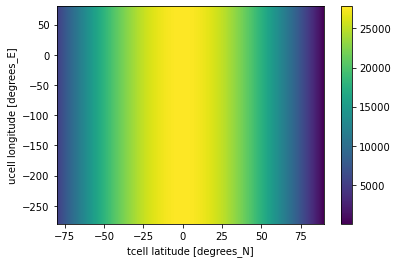

In [12]:
dx.plot()

In [13]:
ds.v.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 2005-09-28 13:00:00
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

In [14]:
dz.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

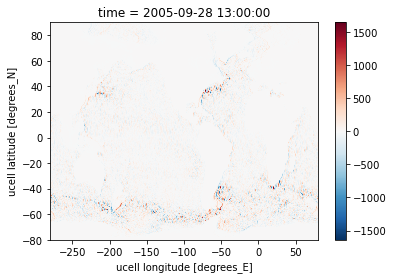

In [15]:
v_vint = (ds.v * dz).sum(dim='st_ocean')
v_vint[0].plot()

In [16]:
v_vint.coords

Coordinates:
  * time      (time) object 2005-09-28 13:00:00
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

In [17]:
dx_interp = grid.interp(dx, 'Y', boundary='fill', fill_value = np.nan)

In [18]:
dx_interp.coords

Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

In [19]:
v_mint = (v_vint * dx_interp).sum(dim='xu_ocean') / 1e6
v_mint.attrs['units'] = 'Sv'
v_mint.attrs['long_name'] = 'Total Meridional Volume Transport'

In [20]:
v_mint

<xarray.DataArray (time: 1, yu_ocean: 1070)>
array([[ 0.        ,  0.        ,  0.        , ..., -0.00117613,
         0.00011331,  0.        ]])
Coordinates:
  * time      (time) object 2005-09-28 13:00:00
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
Attributes:
    units:      Sv
    long_name:  Total Meridional Volume Transport

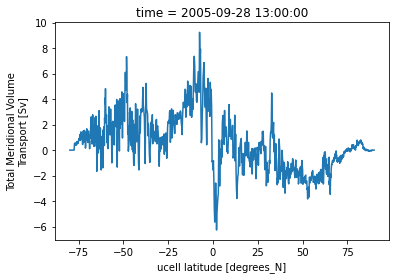

In [22]:
v_mint.plot()

# Volume budget - WG

In [29]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
lower_lat = 0 #-74.16667˚S
upper_lat = 37 #-61.83˚S
left_lon =  114 #65.5˚W
right_lon = 210 #30.5˚E

lower_lat_u = 0 #-74.0
upper_lat_u = 37 #-61.67 python is left exclusive so will have -62.0 in array
left_lon_u = 114 #65.0˚W 
right_lon_u = 210 #31.0˚E python is left exclusive so will have 30.0˚E

In [30]:
#set the boundaries
lat_range = dict(lat=slice(lower_lat, upper_lat), lat_u=slice(lower_lat_u, upper_lat_u))
lon_range = dict(lon=slice(left_lon, right_lon), lon_u=slice(left_lon_u, right_lon_u))

lat_range_no_u = dict(lat=slice(lower_lat, upper_lat))
lon_range_no_u = dict(lon=slice(left_lon, right_lon))

lat_range_u = dict(lat_u=slice(lower_lat_u, upper_lat_u))
lon_range_u = dict(lon_u=slice(left_lon_u, right_lon_u))